In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Reading file

In [20]:
df = pd.read_csv("people.csv")

In [21]:
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [22]:
df.isnull().sum()

Age             0
agegroup        0
height          0
status          0
yearsmarried    0
dtype: int64

In [23]:
df.describe()

,Age,height,yearsmarried
count,5.000000,5.00000,5.000000
mean,59.200000,2.54000,4.800000
std,91.163041,5.45967,8.642916
min,2.000000,-7.00000,-1.000000
25%,18.000000,3.00000,0.000000
50%,21.000000,5.00000,2.000000
75%,34.000000,5.70000,3.000000
max,221.000000,6.00000,20.000000


Creating a ruleset

In [24]:
def checkrules(df) :
  df['Rule1'] = df['Age'].apply(lambda x : True if x>0 and x<150 else False)
  df['Rule2'] = df.apply(lambda x : True if x.Age > x.yearsmarried else False, axis=1)
  df['Rule3'] = df['status'].apply(lambda x : True if x=='married' or x=='single' or x=='widowed' else False)
  df['Rule4'] = df.apply(lambda x : True if((x.Age < 18 and x.agegroup == "child") or (x.Age >18 and x.Age<65 and x.agegroup == "adult")
                        or (x.Age >65 and x.agegroup == "elderly")) else False, axis=1)




Checking if correct

In [25]:
checkrules(df)

In [26]:
df

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,False
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


dsexribing ruleset

In [27]:
df_rule_followed = df.iloc[:,5:]

In [28]:
df_rule_followed = df_rule_followed.astype(int)

In [29]:
df_rule_followed

,Rule1,Rule2,Rule3,Rule4
0,1,1,1,1
1,1,1,1,1
2,1,0,1,0
3,0,1,1,1
4,1,1,1,0


In [30]:
df_rule_followed.describe()

,Rule1,Rule2,Rule3,Rule4
count,5.000000,5.000000,5.0,5.000000
mean,0.800000,0.800000,1.0,0.600000
std,0.447214,0.447214,0.0,0.547723
min,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,1.0,0.000000
50%,1.000000,1.000000,1.0,1.000000
75%,1.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,1.0,1.000000


plotting ruleset

Text(0, 0.5, 'Number of rules violated')

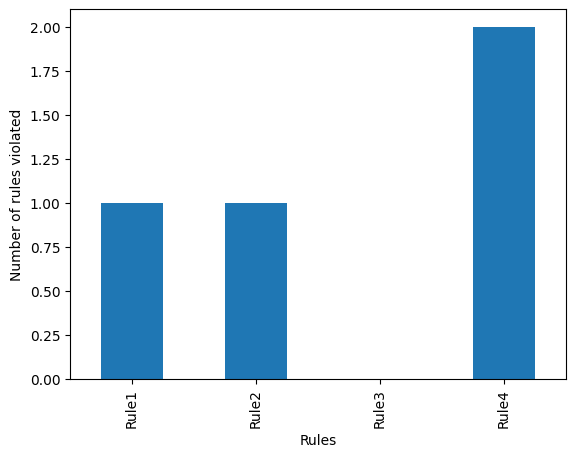

In [32]:
plt.figure()
df_rule_followed.apply(lambda x:len(x) - x.sum()).plot(kind='bar')
plt.xlabel("Rules")
plt.ylabel("Number of rules violated")